<a href="https://colab.research.google.com/github/aniketmishr/ml-tutorial/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("salary_data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
data = data[["Years of Experience", "Salary"]]
data = data.dropna()
data.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


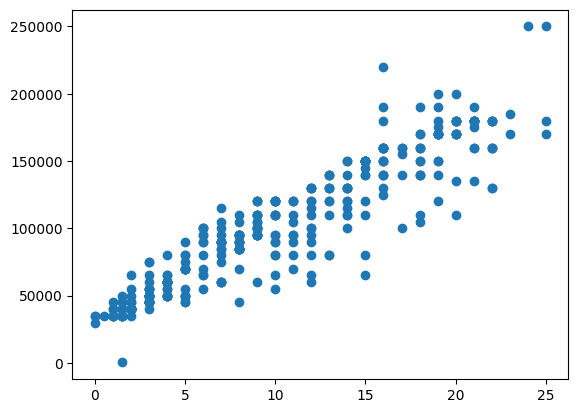

In [ ]:
plt.scatter(data["Years of Experience"], data["Salary"])
plt.show()

In [14]:
from sklearn import linear_model
X = data["Years of Experience"].to_numpy()
y= data["Salary"].to_numpy()

In [15]:
lr = linear_model.LinearRegression()


In [16]:
lr.fit(X.reshape(-1,1), y)

LinearRegression()

In [17]:
print(lr.coef_, lr.intercept_)

[6844.51051448] 31921.21691704422


In [ ]:
lr.predict(X.reshape(-1,1))
coef = lr.coef_
intercept = lr.intercept_

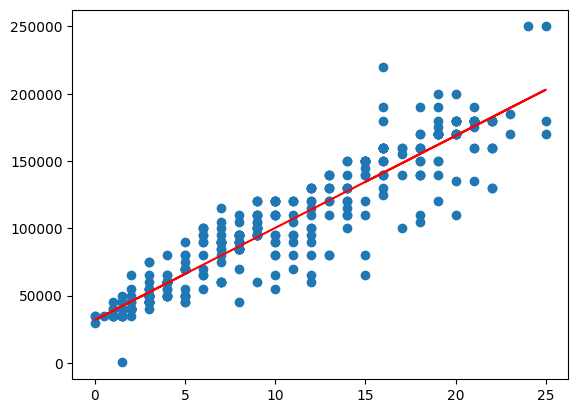

In [ ]:
plt.scatter(data["Years of Experience"], data["Salary"])
plt.plot(X, lr.predict(X.reshape(-1,1)), c= "r")
plt.show()

#Custom Implementation


In [105]:
class LinearRegCustom:
  #constructor
  def __init__(self, lr = 0.003):
    self.lr = lr
    self.coef_ = 0
    self.intercept_ = 0

  def fit(self,X,y):
    self._X = X
    self._y = y
    self.gradient_descent()

  def gradient_descent(self):

    for i in range(1000):
      self.coef_ = self.coef_ - self.lr*(self.d_coef())
      self.intercept_ = self.intercept_ - self.lr*(self.d_intercept())


  def d_coef(self):
    summation = 0
    for i in range(0, self._X.shape[0]):
      summation += self._X[i,0]*(self._y[i]-((self.coef_ * self._X[i,0]) + self.intercept_))

    return -2/self._X.shape[0] * summation

  def d_intercept(self):
    summation = 0
    for i in range(0, self._X.shape[0]):
      summation += (self._y[i]-((self.coef_ * self._X[i,0]) + self.intercept_))

    return -2/self._X.shape[0] * summation

  def predict(self,arr):
    prediction = []
    for x in arr:
      y = self.coef_*x + self.intercept_
      prediction.append(y)
    return prediction

In [106]:
customModel = LinearRegCustom()
x,y = data["Years of Experience"].to_numpy().reshape(-1,1), data["Salary"].to_numpy()
customModel.fit(x,y)
print(customModel.coef_, customModel.intercept_)

7215.586326832502 26623.816623663486


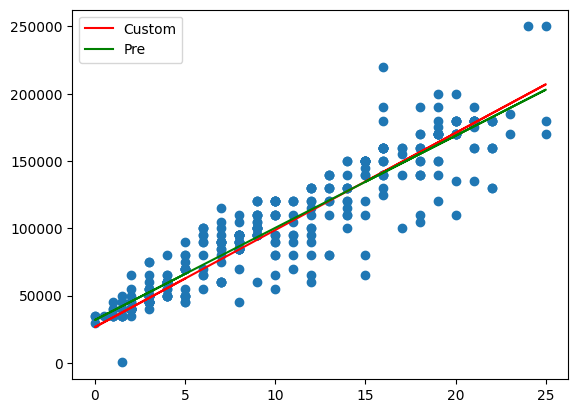

In [107]:
plt.scatter(data["Years of Experience"], data["Salary"])
plt.plot(X, customModel.predict(X.reshape(-1,1)), c= "r", label = "Custom")
plt.plot(X, lr.predict(X.reshape(-1,1)), c= "g", label = "Pre")
plt.legend()
plt.show()